## DELETE BEFORE SUBMISSION
IMPORTANT NOTE:
- dont use libraries implementing kNN / cross-validation
- comment all code (https://stackabuse.com/commenting-python-code/)
- add docstrings to all functions to get info on inputs/outputs + what each function does by SHIFT+TAB-ing function names (https://numpydoc.readthedocs.io/en/latest/format.html)
- when question allows free-form answer, create markdown cell to answer
- upload completed notebook using VLE

MARKING:
[10] Data exploration (+ 2 questions)<br>
[10] Code, docu. & comments (KNN + Evaluation + NCV)<br>
[10] Results (KNN folds + Summary + Confusion matrices)<br>
[10] Final questions<br>
[10] Overall quality & use of Markdown

## 1. Exploratory Data Analysis

In [16]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# load data
wine = datasets.load_wine()
# print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names)
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
y = wine.target

### 1.1. Visualising the data
The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand. When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features.

Your first task is to recreate a grid for the **Wine** dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.

In [58]:
import warnings
import seaborn as sns

# ignore warnings for shading on seaborn
warnings.filterwarnings("ignore")

# define plotting function
def myplotGrid(X, y):
    """
    displays a grid of subplots showing the relationship between X and y
    -------
    inputs:
        X: data
        y: labels
        
    output:
        a grid of subplots (diagram) is drawn as the output where:
        - on-diagonal subplots show distribution for that feature (using seaborn)
        - off-diagonal subplots show interaction between 2 features (using scatter plot)
    """
    
    # stating figure size
    fig = plt.figure(figsize = (18, 18))
    # make l length of selected features
    l = len(selected_features)
    # indexes of last row and first col
    first_col = [0,4,8,12]
    last_row = [13,14,15,16]
    
    # colour coding based on data labels (colours identified)
    colour_scheme = np.array([[0.4, 0, 0.4], [0, 0, 0.9], [0.9, 0, 0]])
    colours = colour_scheme[y]
    # adding counter
    n = 0
    
    # accessing data and creating respective plots [l x l grid]
    for i in range(l): # rows
        for j in range(l): # columns
            # generate l x l grid of subplots
            ax = fig.add_subplot(l, l, n+1)
            
            # displaying axes names
            ylabels = selected_features[i]
            xlabels = selected_features[j]
            
            # displaying horizontal axis on last row
            if n+1 in last_row:
                ax.set_xlabel(xlabels)

            # displaying vertical axis on first column
            if n in first_col:
                ax.set_ylabel(ylabels)
                
            # setting title for each subplot
            ax.set_title(f'{ylabels} vs {xlabels}')
                
            # plot seaborn on single features for on-diagonal subplots
            if i == j:
                for feature in range(0,l):
                    sns.kdeplot(X[:,i][np.where(y == feature)],
                                color = colours[feature], shade = True, ax = ax)

            # plot scatter plot for the other subplots
            else:
                ax.scatter(X[:,j], X[:,i], c = colours)
                
            # move to next plot
            n += 1
                
    plt.show()

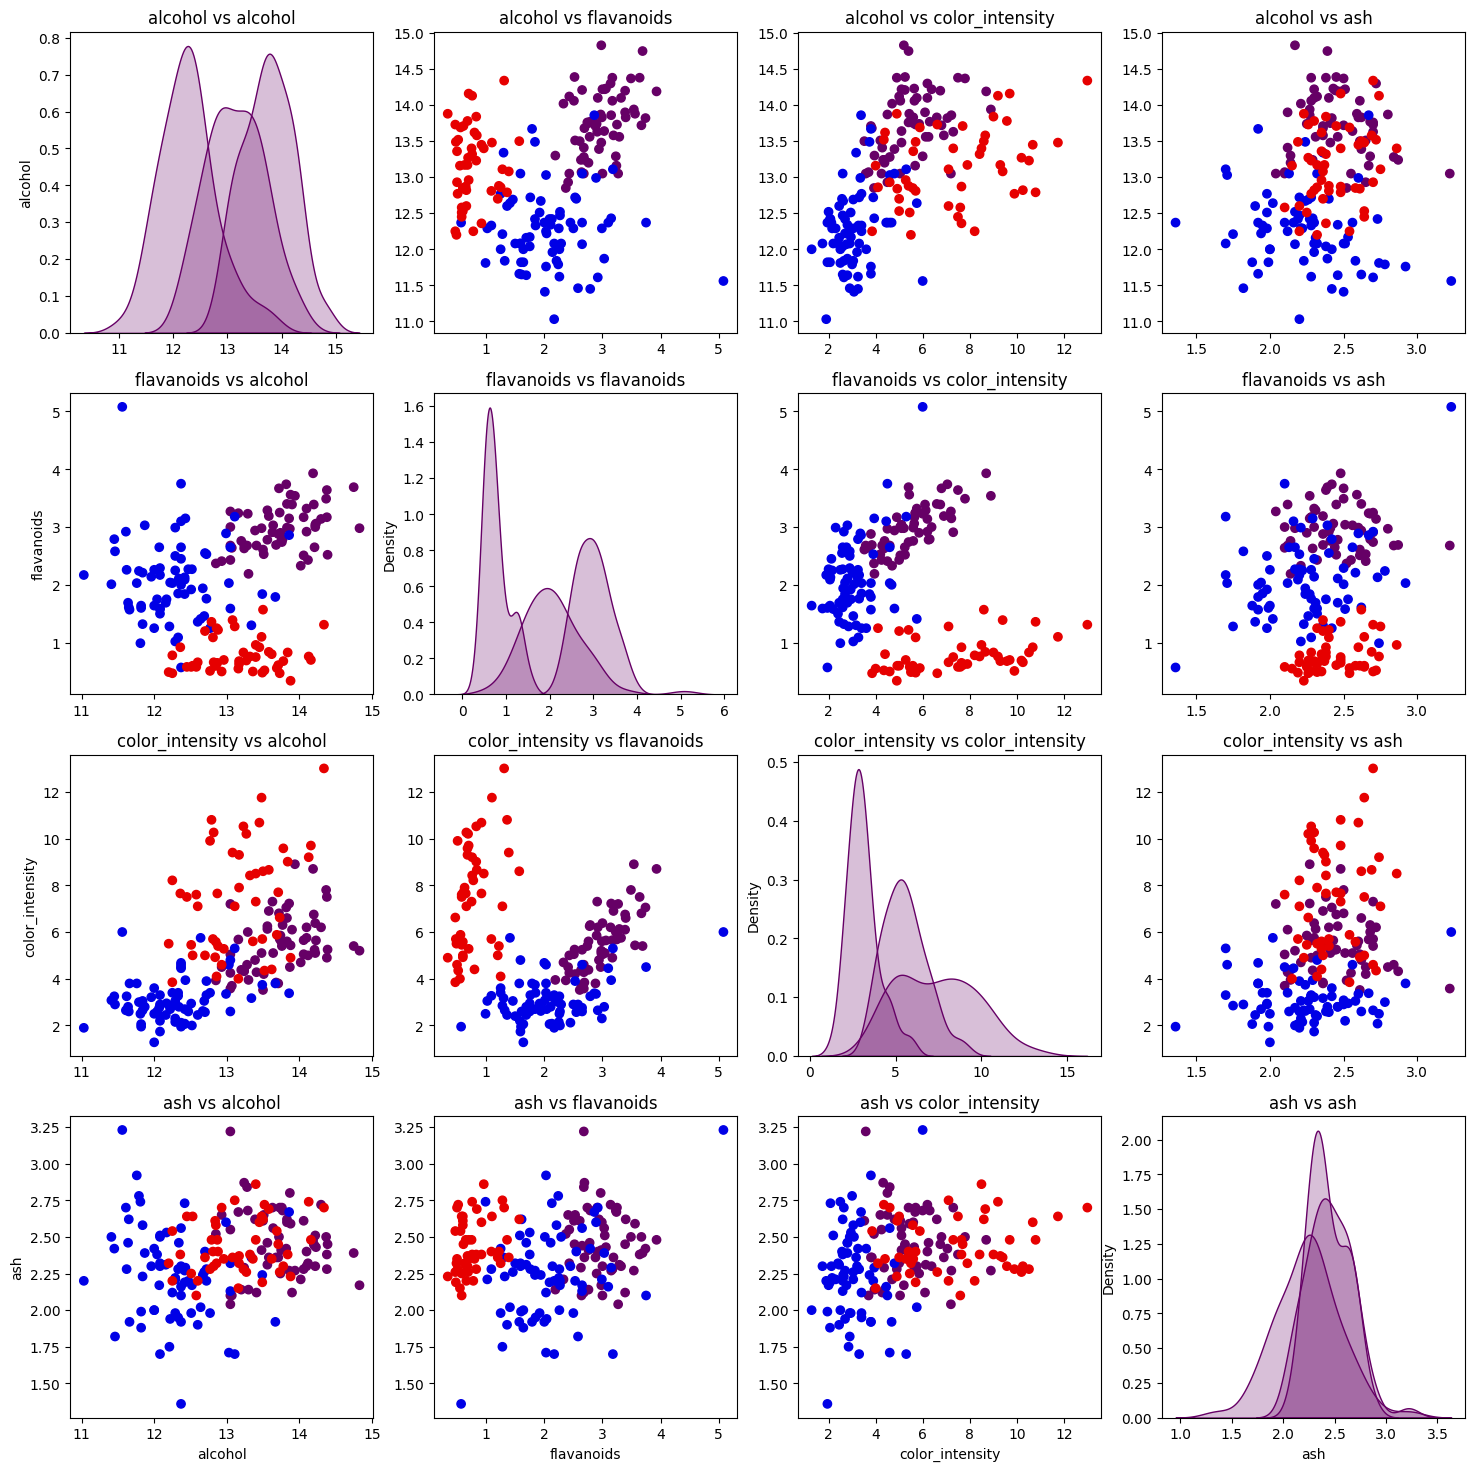

In [59]:
# running the plotting function
myplotGrid(X, y)

### 1.2. Exploratory Data Analysis under noise
When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X. Try to perturb your data with some Gaussian noise

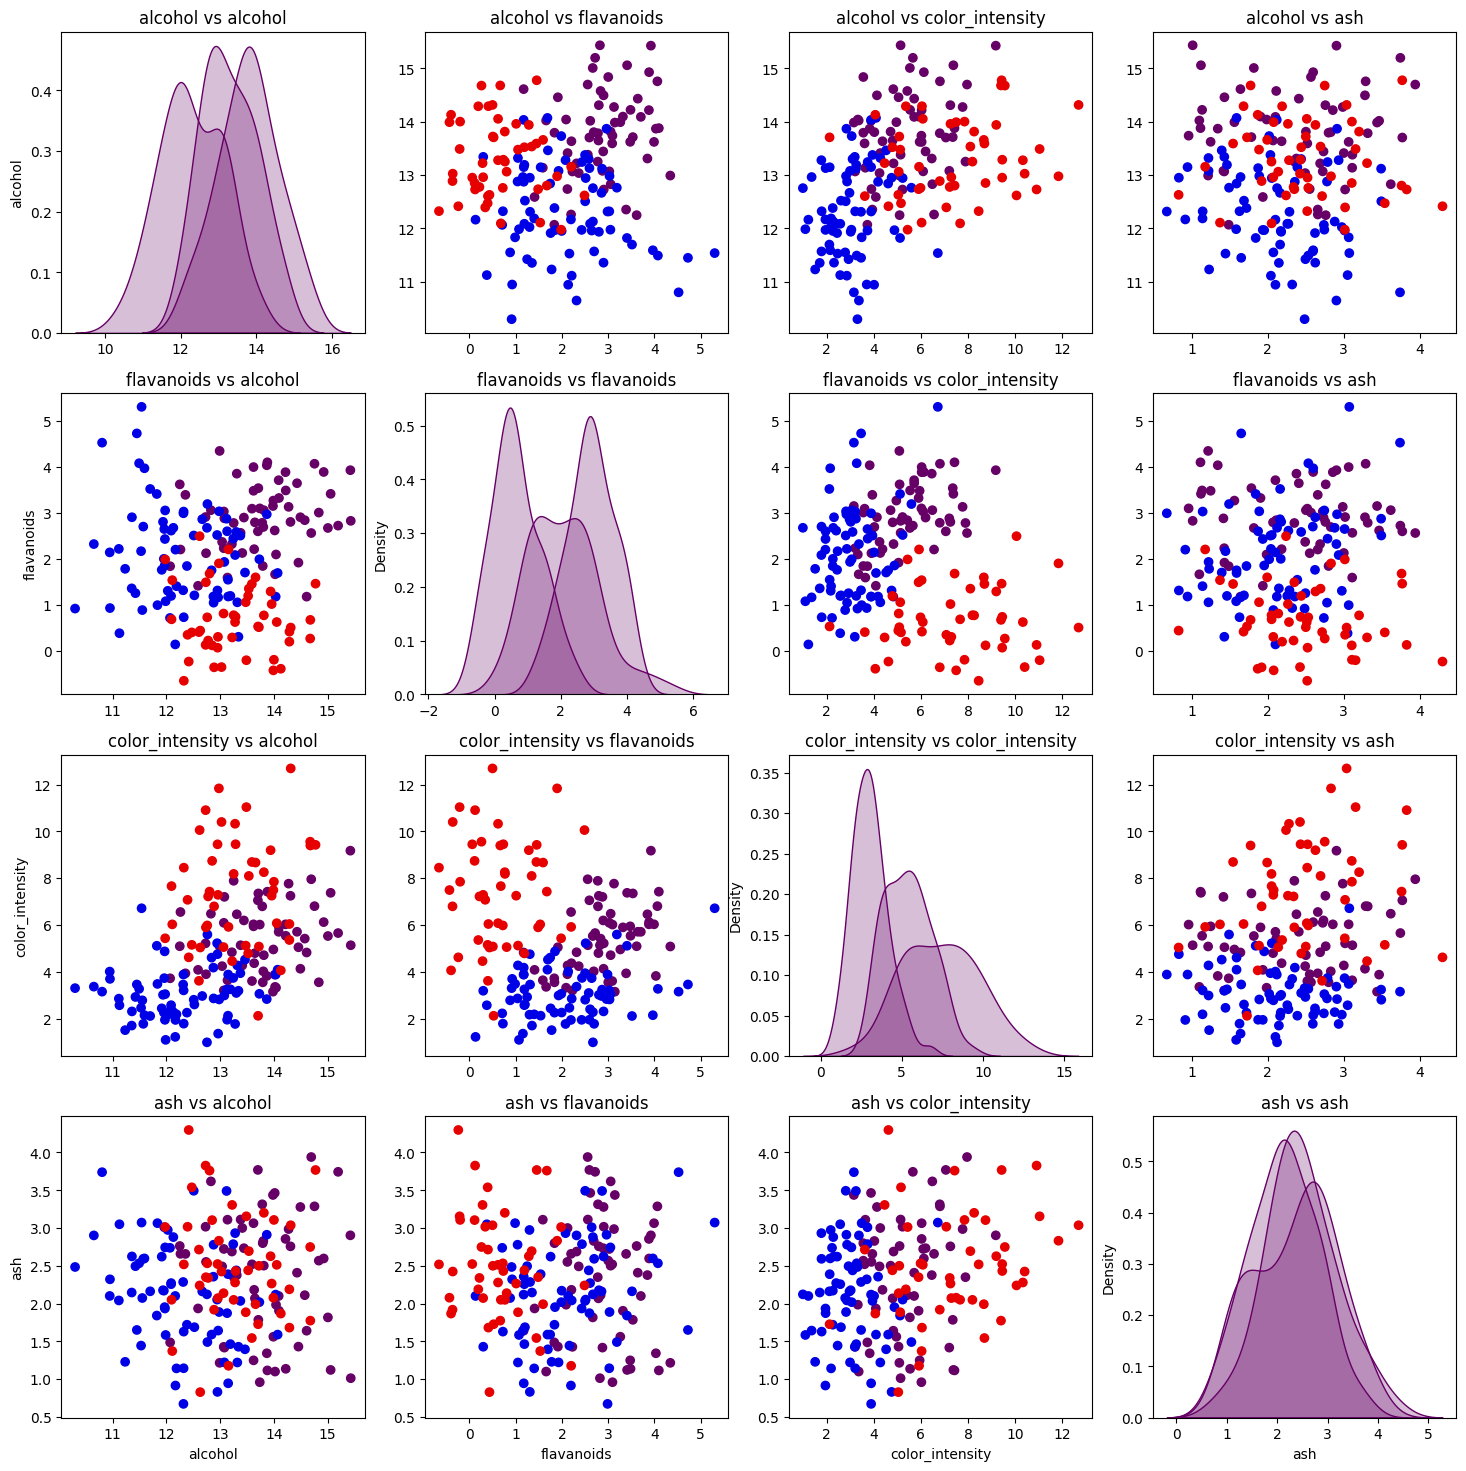

In [60]:
# noise code
# initialising random seed to replicate results
chosenSeed = 281202

# creating seed
np.random.seed(chosenSeed)
# perturbing data with gaussian noise
XN = X + np.random.normal(0, 0.6, X.shape)

# invoking and running
myplotGrid(XN, y)

### 1.3 Questions for part 1
Q1. Exploratory data analysis: Based on your exploratory analysis, if you were to build a classifier using only two of the available features, which ones would you choose and why? Answer as fully as you can.

**Answer**:

Q2. Data with noise: What do you observe by plotting the data without noise compared to plotting with added Gaussian noise?

**Answer**:

## 2. Implementing kNN

In [61]:
# helper code
# distance calculator
def calc_dist(a, b, method):
    """
    calculates distance between 2 vectors
    -------
    inputs:
        a: vector data 1
        b: vector data 2
        method: method of calculation, euclidean or manhattan
    outputs:
        distance based on method chosen:
        - euclidean = sqrt((a.x-b.x)^2 + (a.y-b.y)^2)
        - manhattan = abs(a.x-b.x) + abs(a.y-b.y)
    """
    
    if method == "euclidean":
        dist = np.

# train-test split
def train_test_split(X, y, size):
    """
    splitting data based on test size ratio
    -------
    inputs:
        X: input data
        y: input labels
        size: test data size (between 0 and 1)
    outputs:
        data that has been split:
        - X_train: array of training data
        - X_test: array of testing data
        - y_train: array of training labels
        - y_test: array of testing labels
    """

In [ ]:
# mykNN code
def mykNN(X, y, X_, k, options):
    """
    returns an array of predictions by training on training set and testing on testing set
    -------
    inputs:
        X: training data
        y: training outputs
        X_: testing data
        k: number of nearest neighbours
        options: type of method chosen for calculating distance
    
    output:
        
    """
    
    pass

## 3. Classifier evaluation

## 4. Nested Cross-validation using your implementation of KNN

## 5. Summary of results

## 6. More questions
Q3. Influence of noise: Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used?

**Answer**:

Q4. Tie break: Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

**Answer**:

Q5. Beyond Wine: If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code.

**Answer**: